# Analyse des données : pollution / années
## Projet DALAS
### SOYKOK Aylin - CELIK Simay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data_pollution.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           218 non-null    object 
 1   Air Pollution                                     218 non-null    float64
 2   Drinking Water Pollution and Inaccessibility      218 non-null    float64
 3   Dissatisfaction with Garbage Disposal             218 non-null    float64
 4   Dirty and Untidy                                  218 non-null    float64
 5   Noise and Light Pollution                         218 non-null    float64
 6   Water Pollution                                   218 non-null    float64
 7   Dissatisfaction with Spending Time in the City    218 non-null    float64
 8   Dissatisfaction with Green and Parks in the City  218 non-null    float64
dtypes: float64(8), object(

In [11]:
df.describe()

,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000
mean,47.653532,40.869404,55.437844,54.262890,47.26078,52.052661,45.251743,48.589128
std,22.967446,21.435411,23.539736,22.087037,17.68600,23.103120,21.756046,20.973753
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,30.470000,26.617500,38.290000,40.445000,37.35750,37.335000,28.360000,33.947500
50%,50.000000,41.555000,57.910000,57.030000,50.00000,54.320000,50.000000,50.000000
75%,65.037500,56.097500,72.605000,70.982500,57.10250,68.980000,61.145000,64.215000
max,95.830000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


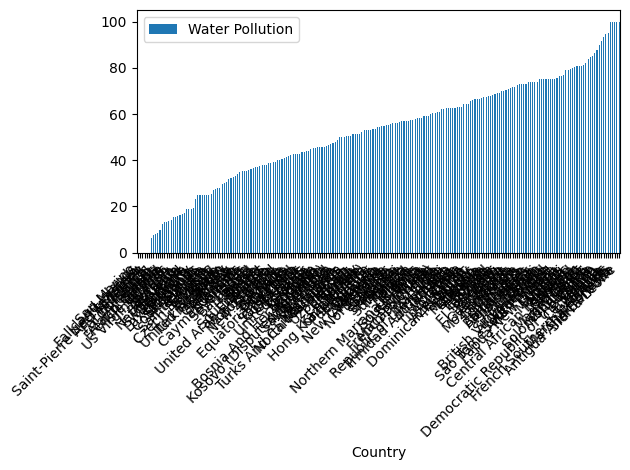

In [37]:

sorted_df = df.sort_values('Water Pollution', ascending=True)
ax = sorted_df.plot(x='Country', y='Water Pollution', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

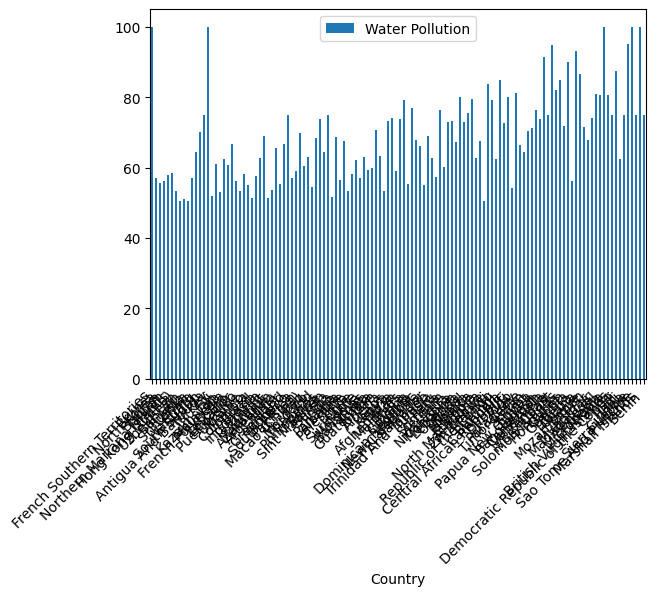

<Figure size 2000x200 with 0 Axes>

In [35]:
sorted_top = sorted_df[sorted_df['Water Pollution'] > 50]
ax = sorted_top.plot(x='Country', y='Water Pollution', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

In [36]:
sorted_top["Country"]

67     French Southern Territories
29                          Brunei
142                    North Korea
23                          Bhutan
192                         Taiwan
                  ...             
80                          Guinea
174                   Sierra Leone
169          Sao Tome And Principe
121               Marshall Islands
21                           Benin
Name: Country, Length: 124, dtype: object

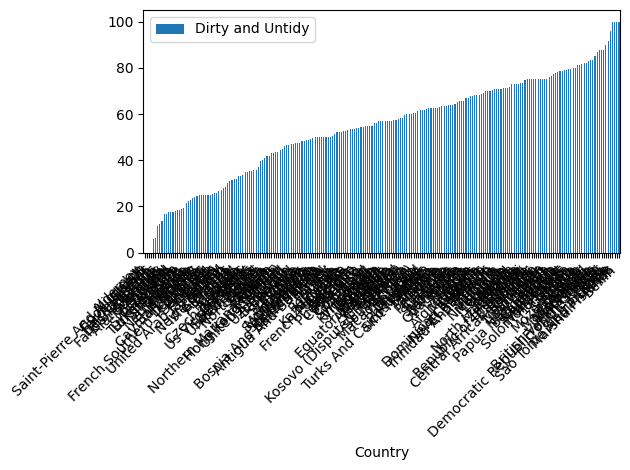

In [32]:
sorted_df = df.sort_values('Dirty and Untidy', ascending=True)
ax = sorted_df.plot(x='Country', y='Dirty and Untidy', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

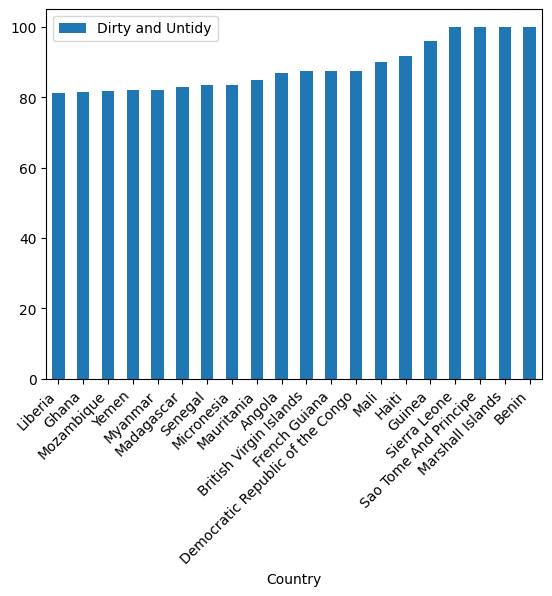

<Figure size 2000x200 with 0 Axes>

In [33]:
sorted_top = sorted_df.iloc[-20:]
ax = sorted_top.plot(x='Country', y='Dirty and Untidy', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

In [34]:
df[df['Country'] == 'Bangladesh']

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
16,Bangladesh,78.19,56.2,78.35,77.7,63.37,73.74,73.86,67.45
